# Tutorium DSCB 230

Raphaele Salvatore Licciardo


## T_20220429

### Aufgabe 1: Data Cleaning + Matplotlib

Lesen Sie die Beispielhaften Dummy Daten MOCK_DATA.csv ein und speichern Sie diese in einem Dataframe. Das sind z.T. sehr viele NaN Werte. Wenn alle Daten ignoriert werden würden, würden nicht mehr viele übrig bleiben. Wir verfolgen zunächst folgende Strategie: 
- Für numerische Werte wird für einen fehlenden Wert der Mittelwert der restlichen Werte eingesetzt.
- Für nicht-numerische Werte wird für einen fehlenden Wert der häufigsten Wert (=Modus) der restlichen Werte eingesetzt.

Zum Auffüllen der Werte stellt scikit-learn die Klasse SimpleImputer bereit.

Im weiteren Sollen Sie nun die Häufigkeitsverteilungen (Methode: value_counts()) für das Attribut gender ermittelt und Grafisch darstellt werden. Beachten Sie das ein Säulen und Liniendiagram in einem Subplot ausgegeben werden soll.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

pd.options.display.max_columns = 50

df = pd.read_csv("MOCK_DATA.csv")

In [2]:
# Zähle alle NaN Werte bevor sie herausgefiltert werden
df.isna().sum()

id              0
first_name      0
last_name       0
email           0
gender          0
ip_address    217
dtype: int64

In [5]:
# NaN Werte entfernen

# ermittle alle Numerischen Columns
num = df.select_dtypes("number").columns
# ermittle alle nicht-Numerischen Columns
qua = df.select_dtypes("object").columns

# Entferne die Numerischen Columns, indem die NaN Werte durch den Mittelwert ersetzt werden.
imp_mean = SimpleImputer(missing_values=np.nan, strategy= 'mean').fit(df[num])
# Entferne die Numerischen Columns, indem die NaN Werte durch den häufigsten Wert ersetzt werden.
imp_most = SimpleImputer(missing_values=np.nan, strategy= 'most_frequent').fit(df[qua])

# Transformieren und Speichern der Werte
df[num] = imp_mean.transform(df[num])
df[qua] = imp_most.transform(df[qua])

# Ausgabe
df

,id,first_name,last_name,email,gender,ip_address
0,1.0,Rafaellle,Gabbott,rgabbott0@theguardian.com,Male,0.213.82.66
1,2.0,Ellerey,Gudgion,egudgion1@seattletimes.com,Male,207.26.67.233
2,3.0,Lionello,Timmermann,ltimmermann2@aol.com,Male,131.92.198.132
3,4.0,Alva,Burnell,aburnell3@smh.com.au,Male,158.10.101.170
4,5.0,Dur,Dulanty,ddulanty4@cmu.edu,Male,238.153.6.253
...,...,...,...,...,...,...
995,996.0,Dore,De Fraine,ddefrainern@statcounter.com,Male,101.147.83.65
996,997.0,Tamera,Marzella,tmarzellaro@odnoklassniki.ru,Female,62.193.131.20
997,998.0,Bill,Killingworth,bkillingworthrp@cafepress.com,Female,125.153.236.230
998,999.0,Pearce,Pasquale,ppasqualerq@feedburner.com,Male,0.213.82.66


In [6]:
# Zähle alle NaN Werte nachdem sie herausgefiltert werden
df.isna().sum()

id            0
first_name    0
last_name     0
email         0
gender        0
ip_address    0
dtype: int64

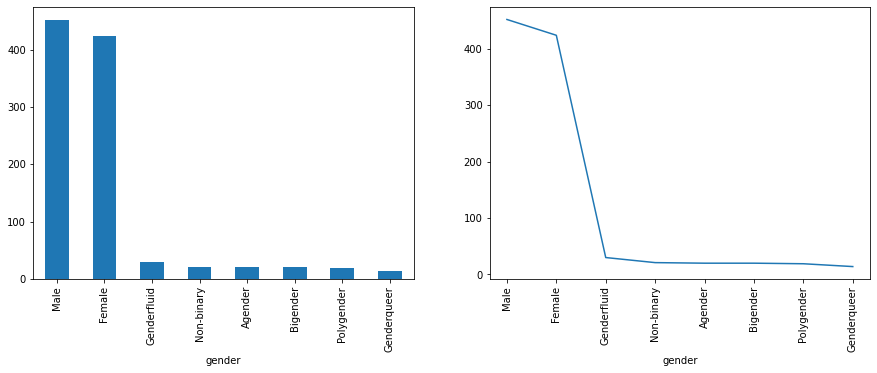

In [7]:
# Subplot erstellen mit zwei Graphen mit einer Größe von 15x5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# Graph 1: Balkendiagramm
df.value_counts(df["gender"]).plot(kind="bar", ax=ax1)
# Graph 2: Säulendiagramm
df.value_counts(df["gender"]).plot(ax=ax2)
# Rotieren der x Achsen Labels um keine Überschneidungen zu haben
plt.xticks(rotation=90)
# Ausgabe
plt.show()